In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv(r'D:\PYTHON\Edunet2.0\day-7\Social_Network_Ads.csv')

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.89      0.86      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
 [[49  3]
 [ 4 24]]


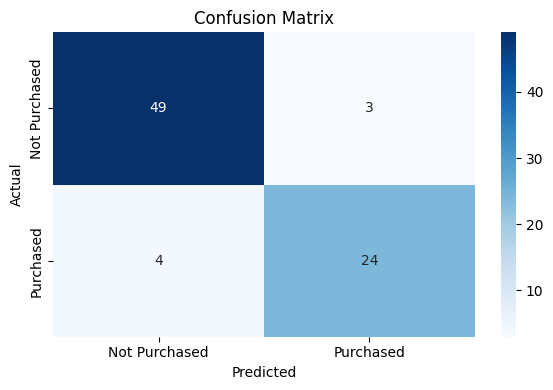

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [34]:
# Predict new input
print("\n--- Predict a New User ---")
gender_input = input("Gender (Male/Female): ").strip().lower()
gender_encoded = 1 if gender_input == 'male' else 0
age = float(input("Age: "))
salary = float(input("Estimated Salary: "))

user_input = np.array([[gender_encoded, age, salary]])
scaled_user_input = scaler.transform(user_input)
user_prediction = knn.predict(scaled_user_input)

print("Prediction:", "✅ Purchased" if user_prediction[0] == 1 else "❌ Not Purchased")


--- Predict a New User ---
Prediction: ❌ Not Purchased


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
